### Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### 1. Изучение данных

In [1]:
import pandas as pd   #импорт библиотек 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv') #чтение файла

In [3]:
display(data_calls.head()) #первые 5 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_calls.info() #общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок



In [5]:
data_internet = pd.read_csv('/datasets/internet.csv')

In [6]:
display(data_internet.head()) #первые 5 строк таблицы

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
data_internet.info() #общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя



In [8]:
data_messages = pd.read_csv('/datasets/messages.csv') #чтение файла

In [9]:
display(data_messages.head()) #первые 5 строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
data_messages.info() #общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение



In [11]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv') #чтение файла

In [12]:
display(data_tariffs.head()) #первые 5 строк таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
data_tariffs.info() #общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [14]:
data_users = pd.read_csv('/datasets/users.csv') #чтение файла

In [15]:
display(data_users.head()) #первые 5 строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
data_users.info() #общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя 
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — тарифный плана



Вывод:
- столбцы с датой необходимо перевести в date_time 
- имеются пропуски в churn_date 	
- длительность звонков необходимо округлить в большую сторону    

###  2. Подготовка данных

В столбцах, в которых есть дата, меняем тип на date_time

In [17]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],format='%Y-%m-%d')

In [18]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [19]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [20]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [21]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

Округлим значения в 'duration' и 'mb_used' в большую сторону 

In [22]:
data_calls['duration'] = np.ceil(data_calls['duration'])

Переведем значения в 'duration' и 'mb_used' в целочисленные

In [23]:
data_calls['duration'] = data_calls['duration'].astype('int64')

In [24]:
data_internet['mb_used'] = data_internet['mb_used'].astype('int64')

Заменим значения NaN нулями в столбце churn_date (смены оператора не было)

In [25]:
data_users['churn_date'] = data_users['churn_date'].fillna(0)

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [26]:
data_calls['month'] = data_calls['call_date'].dt.month #добавим столбец месяца

In [27]:
call_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])#сводная таблица 
call_pivot.columns = ['minutes_calls', 'count_calls'] #переименование столбцов               

In [28]:
call_pivot

minutes_calls  count_calls
user_id month                            
1000    5                159           22
        6                172           43
        7                340           47
        8                408           52
        9                466           58
...                      ...          ...
1498    10               247           41
1499    9                 70            9
        10               449           68
        11               612           74
        12               492           69

[3174 rows x 2 columns]

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [29]:
data_messages['month'] = data_messages['message_date'].dt.month # добавим столбец месяца

In [30]:
messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count') # сводная таблица
messages_pivot.columns = ['messages_count'] #переименование столбца

In [31]:
messages_pivot

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [32]:
data_internet['month'] = data_internet['session_date'].dt.month # добавим столбец месяца

In [33]:
internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum') # сводная таблица
internet_pivot.columns = ['sum_mb_used'] #переименование столбца

In [34]:
internet_pivot

sum_mb_used
user_id month             
1000    5             2252
        6            23213
        7            13988
        8            14043
        9            14556
...                    ...
1498    10           20555
1499    9             1844
        10           17766
        11           17945
        12           13037

[3203 rows x 1 columns]

Объединим таблицу data_users c полученными сводными таблицами, используя метод merge:

In [35]:
data_merge = (
    data_users.merge(call_pivot.reset_index(), on='user_id', how='right')
    .merge(messages_pivot.reset_index(), on=['user_id', 'month'], how='outer')
    .merge(internet_pivot.reset_index(), on=['user_id', 'month'], how='outer')
)

In [36]:
#### КОД РЕВЬЮЕРА
display(data_merge[data_merge['user_id']==1489])
display(internet_pivot.reset_index()[internet_pivot.reset_index()['user_id']==1489])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,messages_count,sum_mb_used
3208,1489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,8,NaN,NaN,17.0,11038.0
3209,1489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,9,NaN,NaN,32.0,17183.0
3210,1489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,10,NaN,NaN,21.0,19538.0
3211,1489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,11,NaN,NaN,20.0,17471.0
3212,1489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,12,NaN,NaN,35.0,17298.0


,user_id,month,sum_mb_used
3138,1489,8,11038
3139,1489,9,17183
3140,1489,10,19538
3141,1489,11,17471
3142,1489,12,17298


In [37]:
data_merge.head() #проверим результат

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,messages_count,sum_mb_used
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159.0,22.0,22.0,2252.0
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172.0,43.0,60.0,23213.0
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340.0,47.0,75.0,13988.0
3,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408.0,52.0,81.0,14043.0
4,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466.0,58.0,57.0,14556.0


In [38]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   age             3174 non-null   float64       
 2   churn_date      3174 non-null   object        
 3   city            3174 non-null   object        
 4   first_name      3174 non-null   object        
 5   last_name       3174 non-null   object        
 6   reg_date        3174 non-null   datetime64[ns]
 7   tariff          3174 non-null   object        
 8   month           3214 non-null   int64         
 9   minutes_calls   3174 non-null   float64       
 10  count_calls     3174 non-null   float64       
 11  messages_count  2717 non-null   float64       
 12  sum_mb_used     3203 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.5+ KB


После объединения data_users со сводными таблицами появились пропуски. Заменим их на 0 

In [39]:
data_merge = data_merge.fillna(0) #замена NaN на 0

Посчитаем для каждого пользователя помесячную выручку: 

In [40]:
def get_revenue(row):
    
    calls = row['minutes_calls']
    messages = row['messages_count']
    internet = row['sum_mb_used']
    tariff = row['tariff']
    
    
    if tariff == 'smart':
        i=0
    else:
        i=1
        
    overrun_call = data_tariffs['minutes_included'][i] - calls
    if overrun_call < 0:
        call_revenue = -overrun_call * data_tariffs['rub_per_minute'][i]
    else:
        call_revenue = 0
         
    overrun_internet = data_tariffs['mb_per_month_included'][i] - internet
    if overrun_internet < 0:
        internet_revenue = np.ceil((-overrun_internet / 1024)) * data_tariffs['rub_per_gb'][i]
    else:
        internet_revenue = 0
            
    overrun_messages = data_tariffs['messages_included'][i] - messages
    if overrun_messages < 0:
        messages_revenue = -overrun_messages * data_tariffs['rub_per_message'][i]
    else:
        messages_revenue = 0
            
    revenue = call_revenue + internet_revenue + messages_revenue + data_tariffs['rub_monthly_fee'][i]
    return revenue     

In [41]:
data_merge['revenue'] = data_merge.apply(get_revenue,axis=1) # добавим новый столбец в таблицу

In [42]:
data_merge.head() #проверим результат

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,messages_count,sum_mb_used,revenue
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,5,159.0,22.0,22.0,2252.0,1950.0
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,6,172.0,43.0,60.0,23213.0,1950.0
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,7,340.0,47.0,75.0,13988.0,1950.0
3,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,8,408.0,52.0,81.0,14043.0,1950.0
4,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,9,466.0,58.0,57.0,14556.0,1950.0


### 3. Анализ данных

Посчитаем среднее количество, дисперсию и стандартное отклонение минут разговора, количества сообщений и объём интернет-трафика в месяц для тарифа "Ультра"

In [43]:
tariff_ultra = (  
    data_merge.query('tariff == "ultra"')
    .pivot_table(index='month', values=['minutes_calls', 'messages_count', 'sum_mb_used'], aggfunc=['mean', 'var', 'std'])
) # сводная таблица для среднего количества, дисперсии и стандартного отклонения для тарифа "Ультра"     

In [44]:
tariff_ultra.columns = ['Среднее количество сообщений',        #переименование столбцов
                      'Среднее количество минут разговора',
                      'Среднее количество Мб', 
                      'Дисперсия (сообщения)',
                      'Дисперсия (звонки)',
                      'Дисперсия (интернет)',
                      'Стандартное отклонение (сообщения)',
                      'Стандартное отклонение (звонки)',
                      'Стандартное отклонение (интернет)',]                                       

In [45]:
tariff_ultra

,Среднее количество сообщений,Среднее количество минут разговора,Среднее количество Мб,Дисперсия (сообщения),Дисперсия (звонки),Дисперсия (интернет),Стандартное отклонение (сообщения),Стандартное отклонение (звонки),Стандартное отклонение (интернет)
month,,,,,,,,,
1,33.777778,428.111111,13127.333333,940.694444,72769.361111,4.703700e+07,30.670742,269.757968,6858.352809
2,21.958333,297.125000,11764.416667,716.824275,87919.679348,1.130994e+08,26.773574,296.512528,10634.817821
3,32.297297,489.648649,17519.540541,1732.381381,111384.900901,1.197215e+08,41.621886,333.743765,10941.731946
4,32.584906,475.301887,17381.754717,1431.401306,66036.830189,8.876294e+07,37.833865,256.976322,9421.408603
5,37.859375,534.250000,19656.484375,1694.821181,74881.015873,1.029863e+08,41.168206,273.643958,10148.218594
6,40.049383,497.469136,18891.074074,1737.397531,86019.652160,8.748296e+07,41.682101,293.291071,9353.232609
7,48.477273,564.397727,20427.829545,2143.217868,86952.587121,1.038129e+08,46.294901,294.877241,10188.863356
8,47.864078,530.611650,19573.718447,2068.824481,91169.553588,1.114204e+08,45.484332,301.942964,10555.587913
9,51.810811,558.882883,19076.576577,2041.863882,98597.904341,9.113643e+07,45.186988,314.003032,9546.540145


Посчитаем среднее количество, дисперсию и стандартное отклонение минут разговора, количества сообщений и объём интернет-трафика в месяц для тарифа "Смарт"

In [46]:
tariff_smart = (
    data_merge.query('tariff == "smart"')
    .pivot_table(index='month', values=['minutes_calls', 'messages_count', 'sum_mb_used'], aggfunc=['mean', 'var', 'std'])
) # сводная таблица для среднего количества, дисперсии и стандартного отклонения для тарифа "Смарт"

In [47]:
tariff_smart.columns = ['Среднее количество сообщений',      #переименование столбцов
                      'Среднее количество минут разговора',
                      'Среднее количество Мб', 
                      'Дисперсия (сообщения)',
                      'Дисперсия (звонки)',
                      'Дисперсия (интернет)',
                      'Стандартное отклонение (сообщения)',
                      'Стандартное отклонение (звонки)',
                      'Стандартное отклонение (интернет)',]        

In [48]:
tariff_smart

,Среднее количество сообщений,Среднее количество минут разговора,Среднее количество Мб,Дисперсия (сообщения),Дисперсия (звонки),Дисперсия (интернет),Стандартное отклонение (сообщения),Стандартное отклонение (звонки),Стандартное отклонение (интернет)
month,,,,,,,,,
1,18.235294,203.852941,8503.352941,262.367201,23787.341355,4.143752e+07,16.197753,154.231454,6437.197903
2,24.086207,298.689655,11582.086207,473.097701,36412.287961,3.893244e+07,21.750809,190.820041,6239.586863
3,31.857143,390.051948,15084.532468,718.492481,36823.155161,3.388529e+07,26.804710,191.893604,5821.107158
4,30.741071,367.133929,13444.651786,602.139559,34778.207127,3.238468e+07,24.538532,186.489161,5690.754295
5,33.773050,387.361702,15784.829787,730.990983,34820.061094,3.565202e+07,27.036845,186.601343,5970.931176
6,33.312883,398.067485,15794.981595,810.463228,29960.520109,3.360031e+07,28.468636,173.091075,5796.577566
7,33.751244,408.353234,15722.706468,799.887811,32250.269602,3.469128e+07,28.282288,179.583601,5889.930217
8,33.709402,423.269231,16613.367521,840.661971,34177.270551,3.121548e+07,28.994171,184.870956,5587.081736
9,33.644788,430.266409,16279.177606,793.671785,32950.529526,2.703876e+07,28.172181,181.522807,5199.880822


Среднее количество сообщений по месяцам:

Text(0, 0.5, 'Количество сообщений')

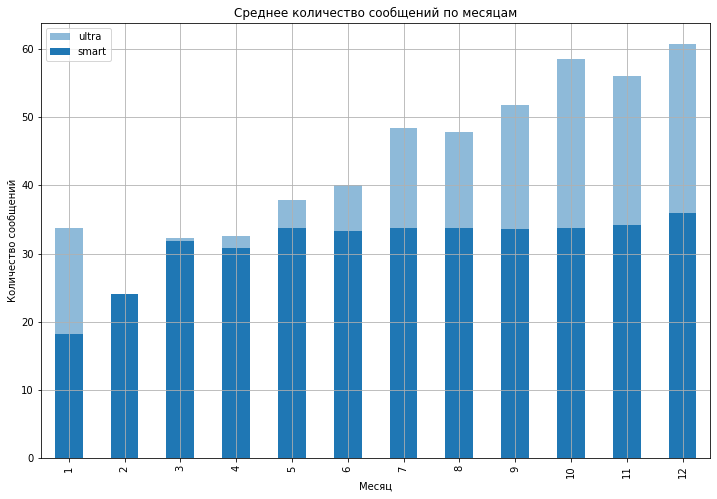

In [49]:
ax = tariff_ultra.plot(y='Среднее количество сообщений', kind='bar', alpha=0.5, figsize=(12, 8), label='ultra')
tariff_smart.plot(y='Среднее количество сообщений', kind='bar', figsize=(12, 8), grid=True, ax=ax, label='smart')
plt.title('Среднее количество сообщений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')

Среднее количество минут разговора по месяцам:

Text(0, 0.5, 'Количество минут')

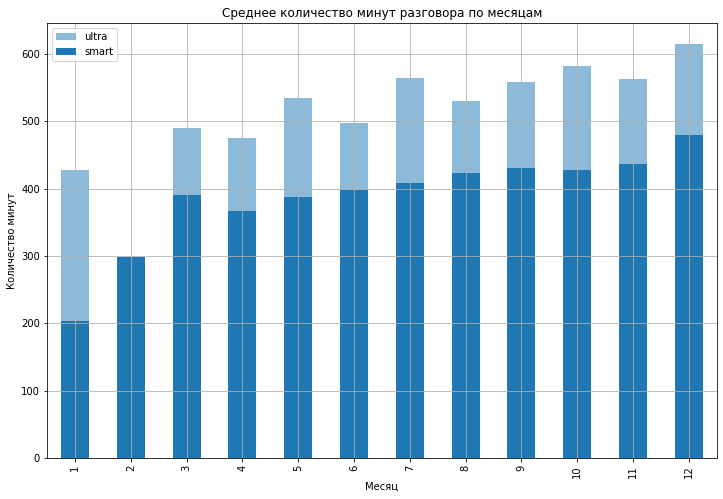

In [50]:
ax = tariff_ultra.plot(y='Среднее количество минут разговора', kind='bar', alpha=0.5, figsize=(12, 8), label='ultra')
tariff_smart.plot(y='Среднее количество минут разговора', kind='bar', figsize=(12, 8), grid=True, ax=ax, label='smart')
plt.title('Среднее количество минут разговора по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество минут')

Среднее количество мегабайт интернета по месяцам:

Text(0, 0.5, 'Количество мегабайт')

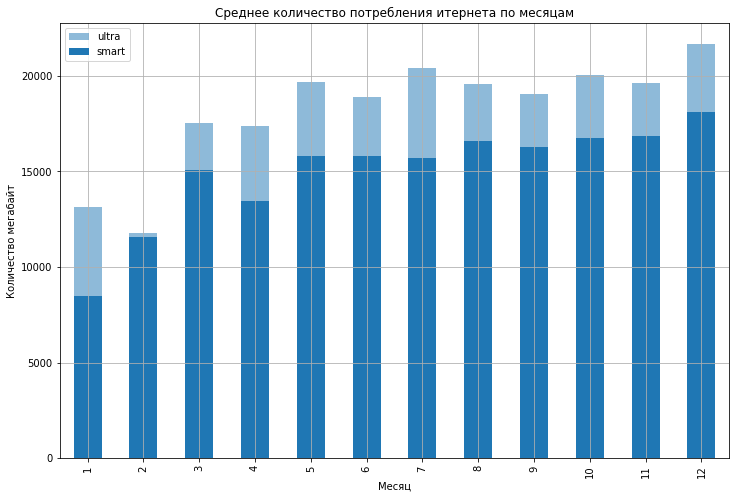

In [51]:
ax = tariff_ultra.plot(y='Среднее количество Мб', kind='bar', alpha=0.5, figsize=(12, 8), label='ultra')
tariff_smart.plot(y='Среднее количество Мб', kind='bar', figsize=(12, 8), grid=True, ax=ax, label='smart')

plt.title('Среднее количество потребления итернета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество мегабайт')

Вывод:

Пользователи тарифа Ultra используют (в месяц):
- от 21 до 60 сообщений 
- от 297 до 614 минут разговоров
- от 11764 до 21673 мб интренета

Пользователи тарифа Smart используют (в месяц):

- от 18 до 35 сообщений
- от 203 до 479 минут разговора
- от 8503 до 18092 мб интернета 

Построим гистограммы для тарифов "Смарт"

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: minutes_calls, dtype: float64

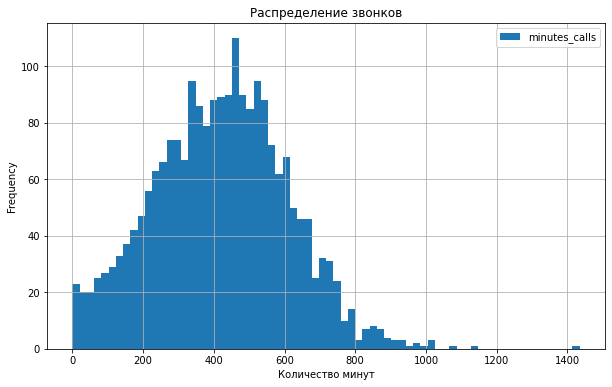

In [52]:
data_merge[data_merge['tariff'] == 'smart'].plot(y='minutes_calls', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение звонков')
plt.xlabel('Количество минут')

data_merge[data_merge['tariff'] == 'smart']['minutes_calls'].describe()

Чаще всего пользователи тарифа "Смарт" используют от 285 до 545 минут разговоров в месяц, в среднем 419 минут в месяц. 

Text(0.5, 0, 'Количество сообщений')

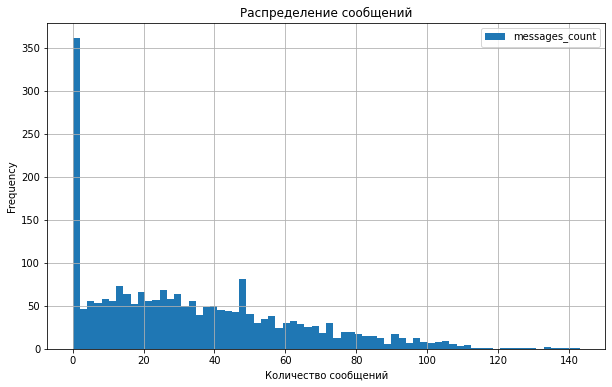

In [53]:
data_merge[data_merge['tariff'] == 'smart'].plot(y='messages_count', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение сообщений')
plt.xlabel('Количество сообщений')

Гистограмма распределения сообщений имеет выбивающееся значение, равное 0. Построим гистограмму, исключая 0

count    2223.000000
mean       33.396311
std        28.259437
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

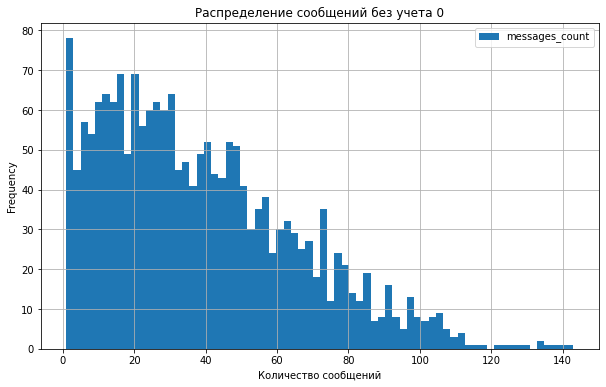

In [54]:
data_merge[(data_merge['tariff'] == 'smart') & (data_merge['messages_count'] > 0)].plot(y='messages_count', kind='hist', 
bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение сообщений без учета 0')
plt.xlabel('Количество сообщений')

data_merge[data_merge['tariff'] == 'smart']['messages_count'].describe()

Чаще всего пользователи тарифа "Смарт" используют от 1 до 51 сообщения в месяц, в среднем 33 сообщения в месяц.

count     2223.000000
mean     16188.556905
std       5869.202863
min          0.000000
25%      12628.500000
50%      16480.000000
75%      20022.500000
max      38510.000000
Name: sum_mb_used, dtype: float64

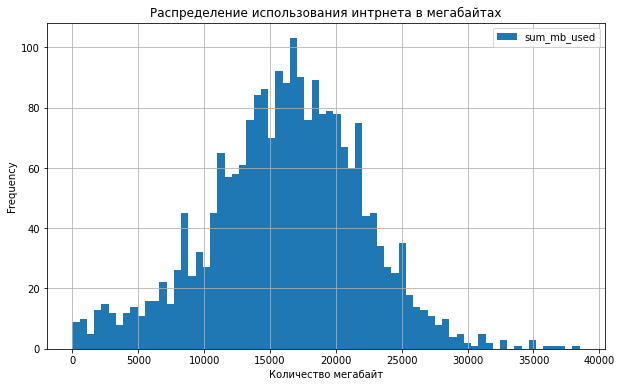

In [55]:
data_merge[data_merge['tariff'] == 'smart'].plot(y='sum_mb_used', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение использования интрнета в мегабайтах')
plt.xlabel('Количество мегабайт')

data_merge[data_merge['tariff'] == 'smart']['sum_mb_used'].describe()

Чаще всего пользователи тарифа "Смарт" используют от 12 до 20 Гб интернета в месяц, в среднем 16 Гб в месяц. 

Построим гистограммы для тарифов "Ультра"

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: minutes_calls, dtype: float64

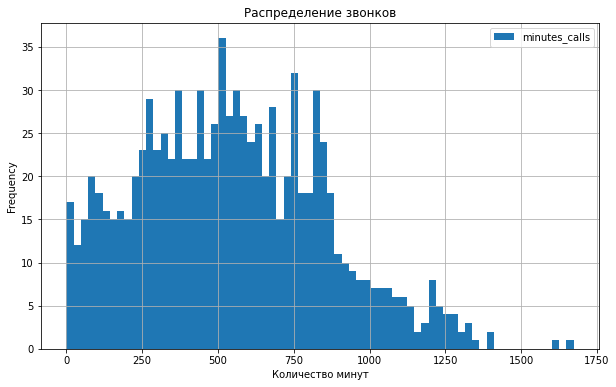

In [56]:
data_merge[data_merge['tariff'] == 'ultra'].plot(y='minutes_calls', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение звонков')
plt.xlabel('Количество минут')

data_merge[data_merge['tariff'] == 'ultra']['minutes_calls'].describe()

Чаще всего пользователи тарифа "Ультра" используют от 310 до 756 минту разговор в месяц, в среднем 545 минут в месяц.

Text(0.5, 0, 'Количество сообщений')

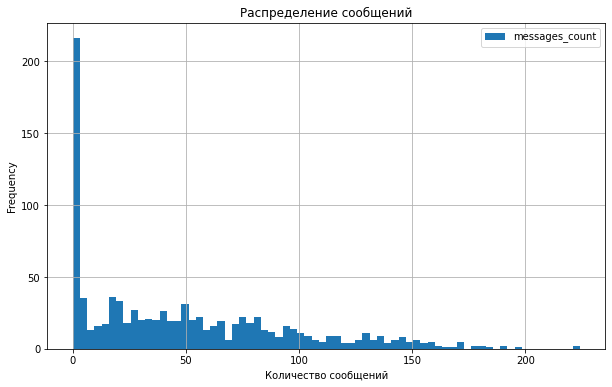

In [57]:
data_merge[data_merge['tariff'] == 'ultra'].plot(y='messages_count', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение сообщений')
plt.xlabel('Количество сообщений')

Гистограмма распределения сообщений имеет выбивающееся значение, равное 0. Построим гистограмму, исключая 0

count    951.000000
mean      49.033649
std       46.890656
min        0.000000
25%        5.000000
50%       39.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

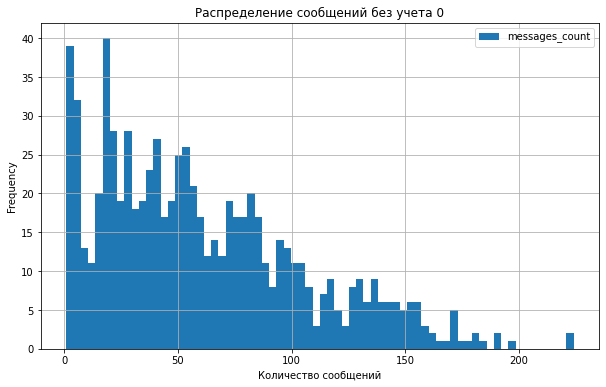

In [58]:
data_merge[(data_merge['tariff'] == 'ultra') & (data_merge['messages_count'] > 0)].plot(y='messages_count', 
kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение сообщений без учета 0')
plt.xlabel('Количество сообщений')

data_merge[data_merge['tariff'] == 'ultra']['messages_count'].describe()

Чаще всего пользователи тарифа "Ультра" используют от 5 до 79 сообщений в месяц, в среднем 49

count      951.000000
mean     19444.310200
std      10117.631086
min          0.000000
25%      11612.000000
50%      19333.000000
75%      26808.000000
max      49701.000000
Name: sum_mb_used, dtype: float64

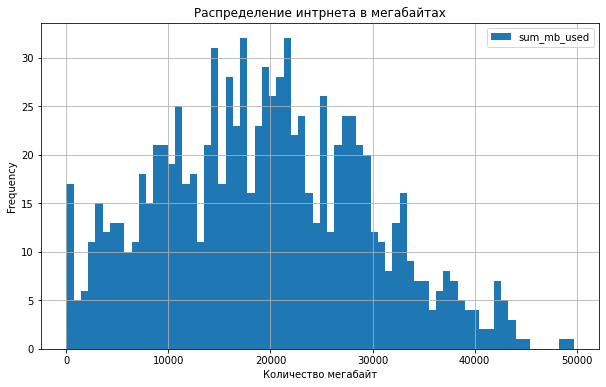

In [59]:
data_merge[data_merge['tariff'] == 'ultra'].plot(y='sum_mb_used', kind='hist', bins=70, figsize=(10, 6), grid=True)
plt.title('Распределение интрнета в мегабайтах')
plt.xlabel('Количество мегабайт')

data_merge[data_merge['tariff'] == 'ultra']['sum_mb_used'].describe()

 Чаще всего пользователи тарифа "Ультра" используют от 11 до 26 Гб интернета в месяц, в среднем 19 Гб в месяц. 

Гистограмма выручки:

Text(0.5, 0, 'Выручка за месяц')

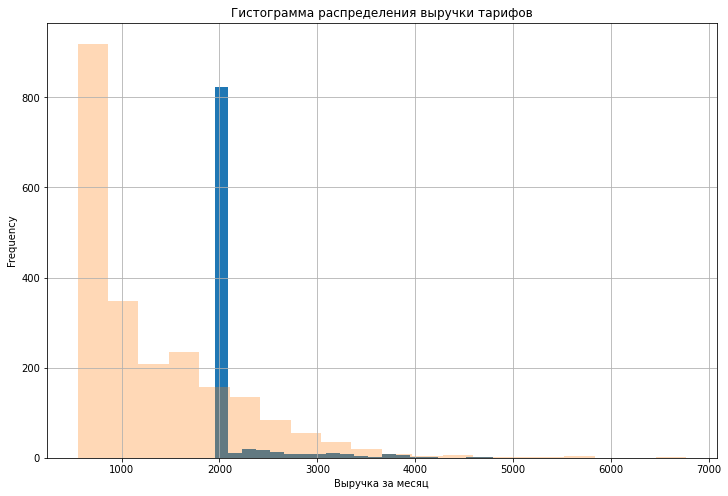

In [60]:
ax = data_merge[data_merge['tariff'] == 'ultra']['revenue'].plot(kind='hist', bins=20, alpha=1, figsize=(12, 8), label='ultra')
data_merge[data_merge['tariff'] == 'smart']['revenue'].plot(kind='hist', bins=20, figsize=(12, 8), grid=True, ax=ax, label='smart', alpha=0.3)

plt.title('Гистограмма распределения выручки тарифов')
plt.xlabel('Выручка за месяц')

Вывод:

Распределение выручки говорит о том, что пользователи тарифа "Смарт" чаще пользователей тарифа "Ультра" пользуются услугами сверх тарифного пакета. 

### 4. Проверка гипотезы

#### 4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Нулевая гипотеза - cредняя выручка пользователей тарифов «Ультра» равна средней выручке пользователей тарифов «Смарт»

Альтернативная гипотеза - cредняя выручка пользователей тарифов «Ультра» не равна средней выручке пользователей тарифов «Смарт»

Для проверки гипотезы используем scipy.stats.ttest_ind, так как имеем две независимые генеральные совокупности.

In [61]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(data_merge[data_merge['tariff'] == 'ultra']['revenue'],
    data_merge[data_merge['tariff'] == 'smart']['revenue'])
                
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.7466794674017725e-157
Отвергаем нулевую гипотезу


Вывод: 
средние выручки пользователей тарифов «Ультра» и «Смарт» различаются статистически значимо.

In [62]:
print('Средняя выручка пользователей тарифов "Ультра":', data_merge[data_merge['tariff'] == 'ultra']['revenue'].mean()) 

Средняя выручка пользователей тарифов "Ультра": 2070.347003154574


In [63]:
print('Средняя выручка пользователей тарифов "Смарт":', data_merge[data_merge['tariff'] == 'smart']['revenue'].mean()) 

Средняя выручка пользователей тарифов "Смарт": 1287.472334682861


#### 4.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза - cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

Альтернативная гипотеза - cредняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

Для проверки гипотезы также используем scipy.stats.ttest_ind

In [64]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(data_merge[data_merge['city'] == 'Москва']['revenue'],
    data_merge[data_merge['city'] != 'Москва']['revenue'])
                
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5949040197865747
Не получилось отвергнуть нулевую гипотезу


Вывод: 

Так как принятая нулевая гипотеза не отвергается по результатам стат. теста, мы можем говорить, что разница между средними, если она есть, получена случайно. Между cредней выручкой пользователей из Москвы и пользователей из других регионов  нет статистически значимой разницы. 

### 5. Общий вывод

В ходе проведения работы мы изучили данные, заменили пропущенные значения, где они были необходимы, исправили ошибки в длительности звонков, а также округлили в большую сторону значения минут разговора и мегабайт интернет-трафика.
Для каждого пользователя расчитано:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя.

Установлено, какое количество минут разговора, сообщений и объёма интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитано среднее количество, дисперсия и стандартное отклонение количества минут разговоров, сообщений и объёма интернет-трафика.

Пользователи тарифа Ultra чаще всего используют:

- от 310 до 756 минту разговор в месяц, в среднем 545 минут в месяц 
- от 5 до 79 сообщений в месяц, в среднем 49 сооющений
- от 11 до 26 Гб интернета в месяц, в среднем 19 Гб в месяц

Пользователи тарифа Smart чаще всего используют:

- от 285 до 545 минут разговоров в месяц, в среднем 419 минут в месяц
- от 1 до 51 сообщения в месяц, в среднем 33 сообщения в месяц
- от 12 до 20 Гб интернета в месяц, в среднем 16 Гб в месяц

Распределение выручки говорит о том, что пользователи тарифа "Смарт" чаще пользователей тарифа "Ультра" пользуются услугами сверх тарифного пакета. 

Было проверено 2 гипотезы, по результатам которых было установлено: 

- Средние выручки пользователей тарифа «Ультра» и «Смарт» различаются статистически значимо.
- Между cредней выручкой пользователей из Москвы и пользователей из других регионов  нет статистически значимой разницы. 